# CODE EXAMPLE OF IMPLEMENTING DECISION TREES

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

Load the dataset and split it into data and target values

In [2]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

Data splicing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Training the model on our data

In [5]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

Testing

     Actual  Predicted
0         1          1
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
109       1          1
110       0          0
111       1          1
112       0          0
113       0          0

[114 rows x 2 columns]


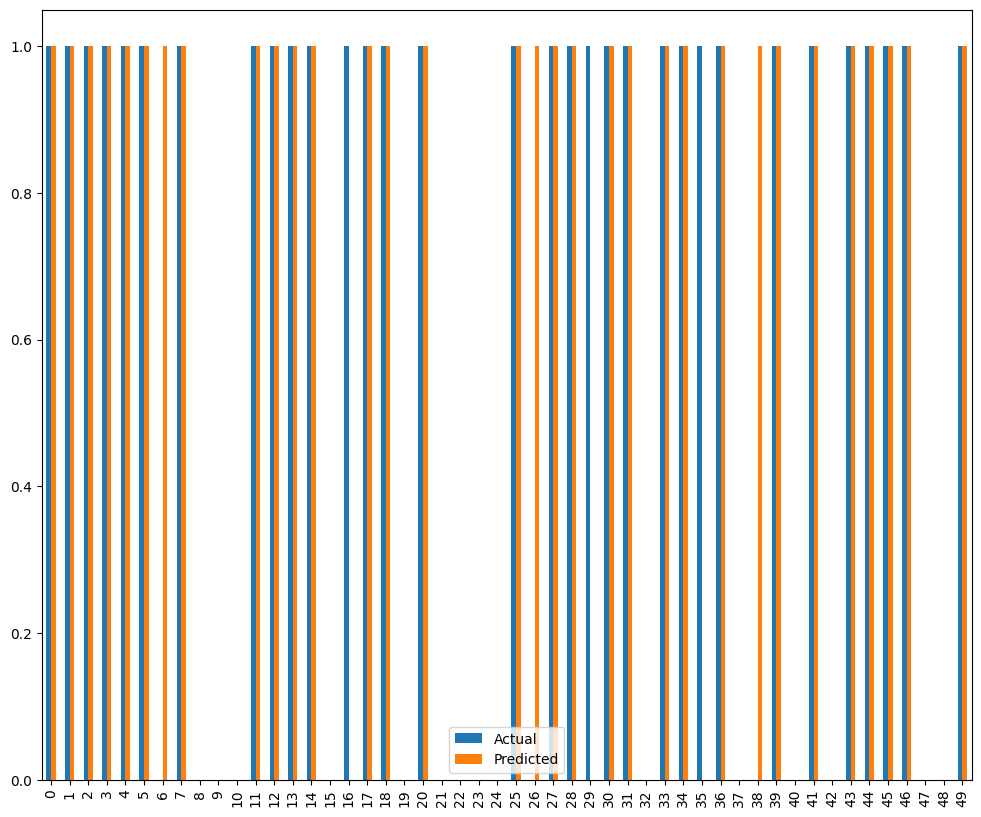

Accuracy 1: 0.868421052631579
Accuracy 2: 0.868421052631579
[0.85714286 0.93406593 0.93406593 0.91208791 0.93406593]


In [6]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

df1 = df.head(50)
df1.plot(kind='bar', figsize=(12,10))
plt.show()

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

ac = accuracy(y_pred, y_test)
print(f"Accuracy 1: {ac}")

metric_ac = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy 2: {metric_ac}")

scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(scores)
